# The mathematical building blocks of neural networks

This chapter covers
* A first example of a neural network
* Tensors and tensor operations
* How neural networks learn via backpropagation and gradient descent

## A first look at a neural network

MNIST Dataset (Hello World in DL):

* Grayscale images of handwritten digits (28x28 pixels)
* 60,000 training images, 10,000 test images
* Goal : to classify the images into their 10 categories (0 to 9)

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-01.png" width="300"><p style="text-align:center">Figure 2.1 MNIST sample digits</p>

**Loading the MNIST dataset in Keras**

In [5]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [91]:
train_images.shape

(60000, 28, 28)

In [92]:
len(train_labels)

60000

In [93]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [94]:
test_images.shape

(10000, 28, 28)

In [95]:
len(test_labels)

10000

In [96]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

#### Workflow

* Build a Neural Network
* Train it using the training data (train_images, train_labels)
* Evaluate the learning process using the test data (see if the predictions of the model match the test_labels)

**Build the Neural Network**

* Building block of NNs: Layer
* Layer: filter of data
* Data distillation : data -> Layer -> data in more useful form (representation)

**The network architecture**

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

**Compilation**

* **optimizer** : mechanism for updating the model
* **loss** : difference between predictions and targets
* **metrics** : meaure of performance of the traing

In [98]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Data transformation**

* Original data : (60000,28,28) uint8 [0,255]
* Transformed data : (60000,28*28) float32 [0,1]

**Preparing the image data**

In [99]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [100]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2562 - accuracy: 0.9266
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1021 - accuracy: 0.9700
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0690 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0497 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0367 - accuracy: 0.9888


**Using the model to make predictions**

In [101]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([3.3804078e-08, 9.5241717e-09, 7.0396864e-06, 1.8526014e-03,
       1.4498147e-10, 3.1729002e-07, 1.9416294e-13, 9.9813443e-01,
       3.2198111e-06, 2.3524426e-06], dtype=float32)

In [102]:
predictions[0].argmax()

7

In [107]:
predictions[0][7]

0.99813443

In [104]:
test_labels[0]

7

**Evaluating the model on new data**

In [105]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0681 - accuracy: 0.9794
test_acc: 0.9793999791145325


We built and trained a NN to classify handwritten digits in less than 15 lines of Python code.

Now let's get deeper

Clarify what's going on behind the scenes

* tensors
* tensor operations
* gradient descent

## Data representations for neural networks

**Tensor** : container of (usually numerical) data

GEneralization of matrices to an arbitrary number of dimensions (axes)

### Scalars (rank-0 tensors)

In [114]:
import numpy as np
x = np.array(12)
x

array(12)

In [115]:
x.ndim

0

### Vectors (rank-1 tensors)

In [116]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [117]:
x.ndim

1

### Matrices (rank-2 tensors)

In [118]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In DL usually one manipulates tensors of ranks 0 to 4 (of 5 for video data)

In [119]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

* rank (number of axes)
* shape (dimensions per axis)
* dtype (type of data contained in the tensor)

MNIST data example to understand tensors

In [120]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [121]:
train_images.ndim

3

In [122]:
train_images.shape

(60000, 28, 28)

In [123]:
train_images.dtype

dtype('uint8')

### Real-world examples of data tensors

**Displaying the fourth digit**

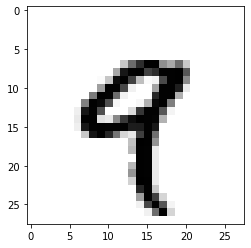

In [80]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [81]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [82]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [83]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [84]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [85]:
my_slice = train_images[:, 14:, 14:]

In [86]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

일반적으로 딥 러닝에서 접하게 되는 모든 데이터 텐서의 첫 번째 축(인덱싱이 0에서 시작하기 때문에 축 0)은 샘플 축(샘플 차원이라고도 함)이 됩니다. MNIST 예에서 "샘플"은 숫자 이미지입니다.

또한 딥 러닝 모델은 전체 데이터 세트를 한 번에 처리하지 않습니다. 오히려 데이터를 작은 배치(batch)로 나눕니다. 구체적으로 다음은 배치 크기가 128인 MNIST 숫자의 배치입니다.

In [87]:
batch = train_images[:128]

In [88]:
batch = train_images[128:256]

In [89]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

조작할 데이터는 거의 항상 다음 범주 중 하나에 속합니다.

* **벡터(vector) 데이터** - shape (samples, features)의 2 rank 텐서, 여기서 각 샘플은 숫자 속성("features")의 벡터입니다. 
* **시계열 데이터 또는 시퀀스 데이터** - 각 샘플이 특징 벡터의 시퀀스(frames 길이의)인 shape (samples, timesteps, features)의 rank 3 텐서
* **이미지(image)** - shape (samples, height, width, channels)의 rank 4 텐서, 여기서 각 샘플은 픽셀의 2D 그리드이고 각 픽셀은 값 벡터("channels")로 표시됩니다.
* **비디오(video)** — 각 샘플이 이미지의 시퀀스(frames 길이의)인 shape (samples, frames, height, width, channels)의 rank 5 텐서

### Vector data

(rand-2)(samples, features)

* dataset of 100,000 people: age, gender, income (100000, 3)
* dataset of 500 text documents with counts of word appears from a 20,000 words dictionary (500, 20000)

### Timeseries data or sequence data

(randk-3) (samples, timesteps, features)

* dataset of a stock: min, current, max value of the stock per minute for 250 days (250,390,3)
* dataset of 1M tweets: 280 characters out of 128 unique characters (one-hot) (1000000, 280,128)


<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-03.png" width="250"><p style="text-align:center">Figure 2.3 A rank-3 timeseries data tensor</p>


### Image data

(rank-4) (samples, height, width, channels)

Conventions:
* channels-last (in Tensorflow)
* channel depth 1 for graysclae images


<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-04.png" width="250"><p style="text-align:center">Figure 2.4 A rank-4 image data tensor</p>

### Video data

(rank-5) (samples, frames, height, width, channels)

4 video clips 60s, 144x256, 4fps (240 frames): (4,240,144,256,3)

if float32, 405MB (irl usually compressed e.g. MPEG)

## The gears of neural networks: tensor operations

Elementary operations among tensors ==> DL

```
keras.layers.Dense(512, activation="relu")

output = relu(dot(input, W) + b)
```

### Element-wise operations

In [124]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [125]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [126]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.00 s


In [127]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.27 s


### Broadcasting

In [128]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [129]:
y = np.expand_dims(y, axis=0)

In [130]:
Y = np.concatenate([y] * 32, axis=0)

In [131]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [132]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [133]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [134]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [135]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [136]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [137]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-05.png" width="300"><p style="text-align:center">Figure 2.5 Matrix dot-product box diagram</p>

더 일반적으로, 2D 경우에 대해 앞에서 설명한 것과 같은 모양 호환성 규칙에 따라 고차원 텐서 간에 내적을 취할 수 있습니다.

(a, b, c, d) • (d,) → (a, b, c)


(a, b, c, d) • (d, e) → (a, b, c, e)

### Tensor reshaping

In [51]:
train_images = train_images.reshape((60000, 28 * 28))

In [52]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [53]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [54]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations
Tensors can be interpreted as points in some geometric space.

Thus tensor operations can have some geometric interpretation.

E.g. Addition is a translation of an object (move it in space without distoring it)

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-06.png" width="150"><p style="text-align:center">Figure 2.6  A point in a 2D space</p>

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-07.png" width="150"><p style="text-align:center">Figure 2.7 A point in a 2D space pictured as an arrow</p>

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-08.png" width="150"><p style="text-align:center">Figure 2.8 Geometric interpretation of the sum of two vectors</p>

일반적으로 변환, 회전, 크기 조정, 기울이기 등과 같은 기본 기하학적 연산은 텐서 연산으로 표현할 수 있습니다. 다음은 몇 가지 예입니다.

* **이동(Translation)**: 점에 벡터를 추가하면 고정된 방향으로 고정된 양만큼 점이 이동합니다.

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-09.png" width="350"><p style="text-align:center">Figure 2.9 2D
translation as a vector addition</p>

* **회전(Rotation)**: 각도 $\theta$ 만큼 시계 반대 방향 회전(그림 2.10 참조)은 2 × 2 행렬 

$$R = [[\cos(\theta),-\sin(\theta)], [\sin (\theta), \cos(\theta)]]$$ 

을 2D 벡터에 곱하기.

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-10.png" width="350"><p style="text-align:center">Figure 2.10 2D rotation
(counterclockwise) as a dot product</p>

* **크기 조정(Scaling)** : 이미지의 수직 및 수평 크기 조정(그림 2.11 참조)은 2 × 2 행렬 

$$S = [[horizontal factor, 0], [0, vertical factor]]$$

을 2D 벡터에 곱하기.

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-11.png" width="350"><p style="text-align:center">Figure 2.11 2D scaling as a dot product</p>

* **선형 변환(linear transform)**: 임의의 행렬에 의한 내적(dot product)은 선형 변환을 구현합니다. 크기 조정 및 회전은 정의상 선형 변환입니다.

* **어파인 변환(affine transform)**: 어파인 변환(그림 2.12 참조)은 선형 변환(일부 행렬의 내적)과 변환(벡터 덧셈)의 조합입니다. 아마 알고 계시겠지만, 정확히 $y = W \cdot x + b $계산은 Dense 레이어에 의해 구현됩니다! 활성화 함수가 없는 Dense 층은 어파인 층입니다.

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-12.png" width="350"><p style="text-align:center">Figure 2.12 Affine
transform in the plane</p>

* **relu 활성화가 없는 Dense 층**: 어파인 변환에 대한 중요한 관찰은 많은 변환을 반복적으로 적용해도 여전히 어파인 변환이 된다는 것입니다. 

$$ \text{affine_2}(\text{affine_1}(x)) = W2 \cdot(W1 \cdot x + b1) + b2 = (W2 \cdot W1) \cdot x + (W2 \cdot b1 + b2) $$

선형 부분이 행렬 $W2\cdot W1$이고 변환 부분이 벡터 $W2\cdot b1 + b2$인 어파인 변환입니다. 결과적으로 활성화 없이 
전체가 Dense 레이어로 구성된 다층 신경망은 단일 Dense 레이어와 동일합니다. 이 "깊은" 신경망은 변장한 선형 모델일 뿐입니다! 

이것이 relu와 같은 활성화 함수가 필요한 이유입니다(그림 2.13에서 실제로 볼 수 있음).  활성화 함수 덕분에 Dense 레이어 체인을 만들어 매우 복잡한 비선형 기하학적 변환을 구현하여 심층 신경망을 위한 매우 풍부한 가설 공간을 만들 수 있습니다. 

Multiple Dense layers (without activation) $=$ One Dense Layer

Multiple Dense layers (with activation) $\not=$ One Dense Layer

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-13.png" width="350"><p style="text-align:center">Figure 2.13 Affine
transform followed by relu activation</p>


### A geometric interpretation of deep learning

3D에서는 다음과 같은 비유가 유용할 수 있습니다. 두 장의 색종이를 상상해 보세요. 하나는 빨간색이고 다른 하나는 파란색입니다. 하나를 다른 하나 위에 놓습니다. 이제 그것들을 함께 작은 공으로 뭉치십시오. 그 구겨진 종이 공이 입력 데이터이고 각 종이 시트는 분류 문제의 데이터 클래스입니다. 신경망이 하려는 것은 종이 공을 펴는 변환을 통해서 두 클래스를 다시 깔끔하게 분리할 수 있도록 하는 것입니다(그림 2.14 참조). 손가락으로 한 번에 한 동작씩 종이 공을 펴는 것과 같이, 3D 공간에 일련의 간단한 변환들로 딥 러닝을 사용하면 구현하게 됩니다.

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-14.png" width="400"><p style="text-align:center">Figure 2.14 Uncrumpling a complicated manifold of data</p>

## The engine of neural networks: gradient-based optimization

```
output = relu( dot(input, W) + b )
```
$W$ and $b$ are the weights or trainable parameters of the layer.

They contain the information learned from the training data.

At the beginning $W$ and $b$ are randomly initialized. The output is more or less meaningless.

The goal is to change $W$ and $b$ so that the output is close to the target

The gradual adjustment of the weights is the training process.

**Training loop**
1. **Draw a batch** of training samples, x, and corresponding targets, y_true
2. **Run the model** on x (a step called the forward pass) to obtain predictions, y_pred
3. **Compute the loss** of the model on the batch, a measure of the mismatch between y_pred and y_true
4. **Update all weights** of the model in a way that slightly reduces the loss on this batch.

Steps 1~3 are easy,

But what about step 4

One can tweak each coefficient separately based on the loss of the result for each change. ==> Terribly in efficient !

Solution : **Gradient Descent**

All DL functions are Differentiable: smooth and continuous

$$ z = z + y $$

small changes in y ==> small changes in z

Also we know if we have to increase or decrease y to decrease z

Same for all model : same changes in the coefficients ==> small predictable changes to the loss.

the tool to do this is called gradient and allows us to change all the coefficients in a single update

Gradient : Describes how the loss varies as you move the model's coefficients in different directions.

### What's a derivative?

$f(x) = y$ continuous, smooth function

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-15.png" width="200"><p style="text-align:center">Figure 2.15 A continuous, smooth function</p>

small change in x ==> small change in y (continous)

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-16.png" width="240"><p style="text-align:center">Figure 2.16 With a continuous function, a small change in x results in a small change in y.</p>
if epsilon_x is small enough we can approximate f as a linear function of slope a (smooth):

$$ f(x + \text{epsilon_x}) = y + a * \text{epsilon_x}$$

The sllope $a$ is called the derivative of $f$ at this point.

It shows which way the result increases (positive for right, negative for left).

The magnitude of the derivative shows how quickly it changes.

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-17.png" width="220"><p style="text-align:center">Figure 2.17 Derivative of f in p</p>

### Derivative of a tensor operation: the gradient

For a scalar function, the derivative represents the local slope of the curve of the function

The gradient of a tensor function represents the curvature of the multidimensional surface described by the function

```python
y_pred = doc(W, x)
loss_value = loss(y_pred, y_true)
loss_value = f(W)
```

$\text{grad}(\text{loss_value}, W0)$ : the derivative of $f$ at a point $W0$

Each coefficient $G[i,j]$ of this indicates the direction an magnitude of the change in loss_value when you modify the $W[i,j]$ coefficient.


### Stochastic gradient descent

1. Draw a batch of training samples, x, and corresponding targets, y_true
2. Run the model on x (a step called the forward pass) to obtain predictions, y_pred (forwaard pass)
3. Compute the loss of the model on the batch : a measure of the mismatch between y_pred and y_true
4. Compute the gradient of the loss with regard to th model's parameters (this is called the backward pass)
5. Move the parameters a little in the opposite direction from the gradient -- for example, W -= learning_rate * gradient -- thus reducing the loss on the batch a bit. The learning rate would be a scalar factor modulating the "speed" of the gradient descent process.

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-18.png" width="200"><p style="text-align:center">Figure 2.18 SGD down a 1D loss curve (one learnable parameter)
</p>

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-19.png" width="300"><p style="text-align:center">Figure 2.19 Gradient descent down a 2D loss surface (two learnable parameters)
</p>

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-20.png" width="250"><p style="text-align:center">Figure 2.20 A local minimum and a global minimum</p>


### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs
<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-21.png" width="150"><p style="text-align:center">Figure 2.21 The computation graph representation of our two-layer model</p>


<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-22.png" width="150"><p style="text-align:center">Figure 2.22 A basic example of a computation graph</p>


<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-23.png" width="150"><p style="text-align:center">Figure 2.23 Running a forward pass</p>


<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-24.png" width="300"><p style="text-align:center">Figure 2.24 Running a backward pass
</p>


<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-25.png" width="300"><p style="text-align:center">Figure 2.25 Path from loss_val to w in the backward graph</p>


#### The GradientTape in TensorFlow

Tensorflow has a tool for automatic differention called <mark>GradientTape</mark>

It keeps record of all the tensor operations excuted in its scope so that you can retrive the gradient of any output with respect to any variables(s)

In [6]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

**The GradientTape works with tensoroperations:**

In [7]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

**It also works with lists of variables**

In [8]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.4794517 , 1.4794517 ],
        [0.31699336, 0.31699336]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## Looking back at our first example

In [9]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-26.png" width="300"><p style="text-align:center">Figure 2.26 Relationship between the network, layers, loss function, and optimizer</p>

In [13]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2557 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1042 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0689 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0504 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0381 - accuracy: 0.9885


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

```
output = activation(dot(input, W) + b) 
```

In [16]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [17]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [18]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [24]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

1. Compute the predictions of the model for the iages in the batch
2. Compute the gradient of the loss with regard to the model's weights
3. Move the weights by a small amout in the direction opposite to the gradient

In [25]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

To update each weight we subtract the corresponding gradient (multiplied by a factor) from it

In [26]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [27]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [28]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [29]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 7.64
loss at batch 100: 2.23
loss at batch 200: 2.19
loss at batch 300: 2.09
loss at batch 400: 2.24
Epoch 1
loss at batch 0: 1.89
loss at batch 100: 1.87
loss at batch 200: 1.81
loss at batch 300: 1.70
loss at batch 400: 1.83
Epoch 2
loss at batch 0: 1.57
loss at batch 100: 1.57
loss at batch 200: 1.49
loss at batch 300: 1.41
loss at batch 400: 1.51
Epoch 3
loss at batch 0: 1.31
loss at batch 100: 1.34
loss at batch 200: 1.23
loss at batch 300: 1.20
loss at batch 400: 1.28
Epoch 4
loss at batch 0: 1.11
loss at batch 100: 1.16
loss at batch 200: 1.04
loss at batch 300: 1.04
loss at batch 400: 1.11
Epoch 5
loss at batch 0: 0.97
loss at batch 100: 1.02
loss at batch 200: 0.90
loss at batch 300: 0.92
loss at batch 400: 0.99
Epoch 6
loss at batch 0: 0.86
loss at batch 100: 0.92
loss at batch 200: 0.80
loss at batch 300: 0.83
loss at batch 400: 0.90
Epoch 7
loss at batch 0: 0.78
loss at batch 100: 0.83
loss at batch 200: 0.72
loss at batch 300: 0.76
loss at batch 40

### Evaluating the model

In [31]:
import numpy as np
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82


## Summary

* Tensors - dtype, rank, and shape.
* tensor operations (addition, tensor product, or element-wise multiplication) : geometric transformations. 
* DL models consist of chains of tensor operations, parameterized by weights (the“knowledge" of the model in tensor form).
* **Larning** : finding a set of values for the weights that minimizes a loss function.
* **Learning** :  Get batches of data samples and targets from train data, compute loss and gradients and change the weights a bit in the opposite direction of the gradient (mini-batch stochastic gradient descent).
* Learning process is possible because : all tensor operation in NN are differentiable => map the current parameters and data batch to a gradient value (backpropagation).
* **Loss** : the quantity you try to minimize 
* **Optimizer**: The way in which the gradient of the loss is used to update the weights (RMSProp, SGD etc.).